# Loan Eligibility Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns


In [3]:
train_data=pd.read_csv("train_loan_prediction.csv")
test_data=pd.read_csv("test_loan_prediction.csv")

In [4]:
train_data.shape

(614, 13)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Preprocessing

In [7]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#filling the null values of categorical variables
train_data["Gender"]=train_data["Gender"].fillna(train_data["Gender"].mode()[0])
train_data["Married"]=train_data["Married"].fillna(train_data["Married"].mode()[0])
train_data["Dependents"]=train_data["Dependents"].fillna(train_data["Dependents"].mode()[0])
train_data["Self_Employed"]=train_data["Self_Employed"].fillna(train_data["Self_Employed"].mode()[0])

In [12]:
#filling the null values of quantitavive variables
train_data["LoanAmount"]=train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean())
train_data["Loan_Amount_Term"]=train_data["Loan_Amount_Term"].fillna(train_data["Loan_Amount_Term"].mean())
train_data["Credit_History"]=train_data["Credit_History"].fillna(train_data["Credit_History"].mean())

In [13]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Exploratory Data analysis

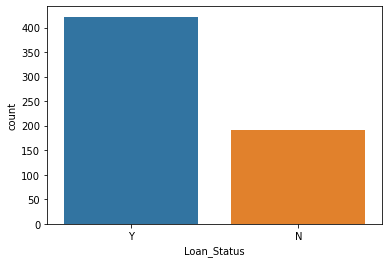

In [17]:
sns.countplot(train_data["Loan_Status"])

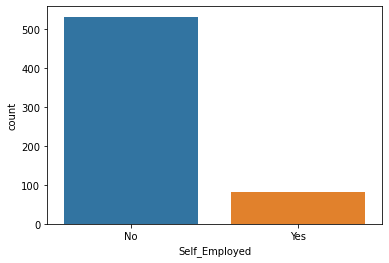

In [19]:
sns.countplot(train_data["Self_Employed"])

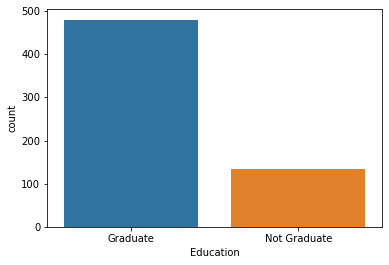

In [20]:
sns.countplot(train_data["Education"])

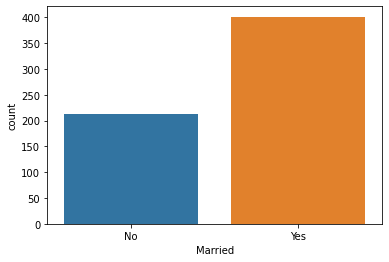

In [21]:
sns.countplot(train_data["Married"])

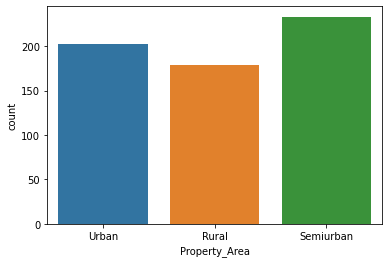

In [22]:
sns.countplot(train_data["Property_Area"])

Text(0.5, 1.0, 'Loan Amount')

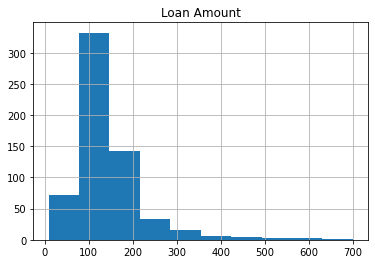

In [26]:
train_data["LoanAmount"].hist(bins=10)
plt.title("Loan Amount")

Text(0, 0.5, 'Loan amount')

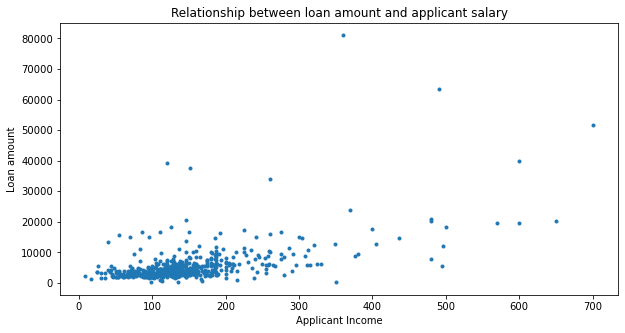

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(train_data["LoanAmount"],train_data["ApplicantIncome"],marker='.')
plt.title("Relationship between loan amount and applicant salary")
plt.xlabel("Applicant Income")
plt.ylabel("Loan amount")

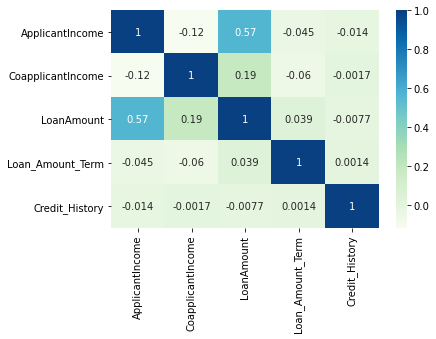

In [34]:
sns.heatmap(train_data.corr(),annot=True,cmap='GnBu')

In [57]:
cols = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Loan_ID']
new = train_data.drop(columns = cols, axis = 1)
new

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


Encoding Data to numeric

In [58]:
from sklearn.preprocessing import LabelEncoder
Te = LabelEncoder()
col = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
#col = ['Dependents']
for c in col:
    new[c] = Te.fit_transform(new[c])
    
new

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.0,2,1
1,1,1,1,0,0,1.0,0,0
2,1,1,0,0,1,1.0,2,1
3,1,1,0,1,0,1.0,2,1
4,1,0,0,0,0,1.0,2,1
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1
610,1,1,3+,0,0,1.0,0,1
611,1,1,1,0,0,1.0,2,1
612,1,1,2,0,0,1.0,2,1


In [62]:
new['Dependents'].replace({'3+':3},inplace=True)
new

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1.0,2,1
1,1,1,1,0,0,1.0,0,0
2,1,1,0,0,1,1.0,2,1
3,1,1,0,1,0,1.0,2,1
4,1,0,0,0,0,1.0,2,1
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1
610,1,1,3,0,0,1.0,0,1
611,1,1,1,0,0,1.0,2,1
612,1,1,2,0,0,1.0,2,1


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
x_train=new.drop("Loan_Status",axis=1)
y_train=new["Loan_Status"]

In [81]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1.0,2
1,1,1,1,0,0,1.0,0
2,1,1,0,0,1,1.0,2
3,1,1,0,1,0,1.0,2
4,1,0,0,0,0,1.0,2


In [82]:
y_train.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [66]:
y_train=pd.DataFrame(y_train)

In [67]:
y_train

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [69]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

C:\Users\91774\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [71]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [85]:
#filling the null values of categorical variables
test_data["Gender"]=test_data["Gender"].fillna(test_data["Gender"].mode()[0])
test_data["Married"]=test_data["Married"].fillna(test_data["Married"].mode()[0])
test_data["Dependents"]=test_data["Dependents"].fillna(test_data["Dependents"].mode()[0])
test_data["Self_Employed"]=test_data["Self_Employed"].fillna(test_data["Self_Employed"].mode()[0])

In [86]:
#filling the null values of quantitavive variables
test_data["LoanAmount"]=test_data["LoanAmount"].fillna(test_data["LoanAmount"].mean())
test_data["Loan_Amount_Term"]=test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].mean())
test_data["Credit_History"]=test_data["Credit_History"].fillna(test_data["Credit_History"].mean())

In [87]:
cols = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Loan_ID']
new_test = test_data.drop(columns = cols, axis = 1)
new_test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,1.000000,Urban
1,Male,Yes,1,Graduate,No,1.000000,Urban
2,Male,Yes,2,Graduate,No,1.000000,Urban
3,Male,Yes,2,Graduate,No,0.825444,Urban
4,Male,No,0,Not Graduate,No,1.000000,Urban
...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,1.000000,Urban
363,Male,Yes,0,Graduate,No,1.000000,Urban
364,Male,No,0,Graduate,No,0.825444,Semiurban
365,Male,Yes,0,Graduate,No,1.000000,Rural


In [88]:
#from sklearn.preprocessing import LabelEncoder
#Te = LabelEncoder()
col = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
#col = ['Dependents']
for c in col:
    new_test[c] = Te.fit_transform(new_test[c])
    
new_test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,1,0,0,0,1.000000,2
1,1,1,1,0,0,1.000000,2
2,1,1,2,0,0,1.000000,2
3,1,1,2,0,0,0.825444,2
4,1,0,0,1,0,1.000000,2
...,...,...,...,...,...,...,...
362,1,1,3+,1,1,1.000000,2
363,1,1,0,0,0,1.000000,2
364,1,0,0,0,0,0.825444,1
365,1,1,0,0,0,1.000000,0


In [95]:
new_test['Dependents'].replace({'3+':3},inplace=True)

In [109]:
x_test=new_test
y_test=pd.Series(dtype="string")

In [110]:
y_predicted=logistic_model.predict(x_test)

In [111]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [112]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [116]:
test_data=pd.read_csv('test_loan_prediction.csv')
result = pd.DataFrame({
        "Loan_ID": test_data['Loan_ID'],
        "Loan_Status": y_predicted
    })

result.to_csv("result_loan_data.csv", index=False)

In [117]:
result_data=pd.read_csv('result_loan_data.csv')

In [118]:
result_data.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
